In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movie_titles_df = pd.read_csv('Movie_Id_Titles.csv')
movie_titles_df.head(70) # Cap = 1682

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
65,66,While You Were Sleeping (1995)
66,67,Ace Ventura: Pet Detective (1994)
67,68,"Crow, The (1994)"
68,69,Forrest Gump (1994)


In [ ]:
movie_titles_df.tail(5)

,item_id,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


In [ ]:
len(movie_titles_df)

1682

In [ ]:
movie_rating_df = pd.read_csv('u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [ ]:
movie_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [ ]:
movie_rating_df.drop('timestamp', axis = 1, inplace = True)

In [ ]:
movie_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [ ]:
movie_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [ ]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [ ]:
movies_rating_df = pd.merge(movie_titles_df, movie_rating_df, on = 'item_id')

In [ ]:
movies_rating_df

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1
99999,1679,B. Monkey (1998),863,3
100000,1680,Sliding Doors (1998),863,2
100001,1681,You So Crazy (1994),896,3


In [ ]:
movies_rating_df.shape

(100003, 4)

In [ ]:
movies_rating_df_title = movies_rating_df.groupby('title').describe()

In [ ]:
movies_rating_df_title.head(5)

item_id                                       \
                            count    mean  std     min     25%     50%   
title                                                                    
'Til There Was You (1997)     9.0  1300.0  0.0  1300.0  1300.0  1300.0   
1-900 (1994)                  5.0  1353.0  0.0  1353.0  1353.0  1353.0   
101 Dalmatians (1996)       109.0   225.0  0.0   225.0   225.0   225.0   
12 Angry Men (1957)         125.0   178.0  0.0   178.0   178.0   178.0   
187 (1997)                   41.0   330.0  0.0   330.0   330.0   330.0   

                                          user_id              ...         \
                              75%     max   count        mean  ...    75%   
title                                                          ...          
'Til There Was You (1997)  1300.0  1300.0     9.0  383.777778  ...  530.0   
1-900 (1994)               1353.0  1353.0     5.0  477.000000  ...  581.0   
101 Dalmatians (1996)       225.0   225.0   109.0  450.330275  ...  699.0   
12 Angry Men (1957)         178.0   178.0   125.0  453.552000  ...  661.0   
187 (1997)                  330.0   330.0    41.0  517.097561  ...  698.0   

                                 rating                                     \
                             max  count      mean       std  min  25%  50%   
title                                                                        
'Til There Was You (1997)  782.0    9.0  2.333333  1.000000  1.0  2.0  2.0   
1-900 (1994)               833.0    5.0  2.600000  1.516575  1.0  1.0  3.0   
101 Dalmatians (1996)      938.0  109.0  2.908257  1.076184  1.0  2.0  3.0   
12 Angry Men (1957)        932.0  125.0  4.344000  0.719588  2.0  4.0  4.0   
187 (1997)                 894.0   41.0  3.024390  1.172344  1.0  2.0  3.0   

                                     
                           75%  max  
title                                
'Til There Was You (1997)  3.0  4.0  
1-900 (1994)               4.0  4.0  
101 Dalmatians (1996)      4.0  5.0  
12 Angry Men (1957)        5.0  5.0  
187 (1997)                 4.0  5.0  

[5 rows x 24 columns]

In [ ]:
rating_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [ ]:
rating_df_mean

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [ ]:
rating_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']

In [ ]:
rating_df_count

,count
title,
'Til There Was You (1997),9.0
1-900 (1994),5.0
101 Dalmatians (1996),109.0
12 Angry Men (1957),125.0
187 (1997),41.0
...,...
Young Guns II (1990),44.0
"Young Poisoner's Handbook, The (1995)",41.0
Zeus and Roxanne (1997),6.0


In [ ]:
rating_mean_count_df = pd.concat([rating_df_mean, rating_df_count], axis = 1)

In [ ]:
rating_mean_count_df

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0
...,...,...
Young Guns II (1990),2.772727,44.0
"Young Poisoner's Handbook, The (1995)",3.341463,41.0
Zeus and Roxanne (1997),2.166667,6.0


In [ ]:
rating_mean_count_df.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


(array([ 69.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   3.,   0.,   1.,
          0.,  11.,   0.,   1.,   3.,   7.,   2.,   5.,   0.,   8.,   6.,
          3.,   5.,   0.,  53.,   2.,   4.,  11.,  11.,  13.,  18.,  11.,
         16.,  14.,  21.,  19.,  40.,  11.,  15.,  23.,  29.,  23.,  35.,
         16.,  38.,  22.,  20.,  18.,   9., 117.,  22.,  32.,  38.,  34.,
         43.,  34.,  30.,  37.,  23.,  36.,  40.,  40.,  31.,  27.,  35.,
         41.,  28.,  25.,  37.,  34.,  24.,  21.,  26.,  16.,  58.,  20.,
         16.,  15.,  10.,   8.,  11.,   7.,   5.,   2.,   0.,   5.,   5.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         10.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.

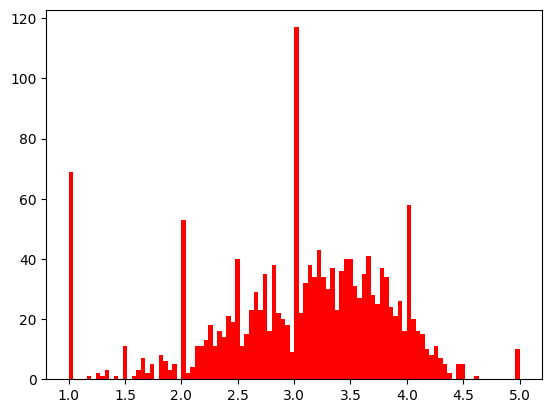

In [ ]:
plt.hist(rating_mean_count_df['mean'], bins = 100, color = 'r')

(array([411., 190., 114.,  84.,  73.,  50.,  58.,  62.,  43.,  40.,  37.,
         40.,  29.,  31.,  20.,  29.,  19.,  18.,  11.,  19.,  15.,  29.,
          9.,  13.,   7.,  14.,  10.,  13.,  11.,  15.,  12.,   7.,   6.,
          7.,   4.,   8.,   5.,  12.,   4.,   4.,   5.,   5.,   7.,   3.,
          3.,   4.,   2.,   4.,   2.,   2.,   9.,   4.,   0.,   1.,   3.,
          2.,   1.,   1.,   1.,   2.,   0.,   0.,   2.,   0.,   2.,   1.,
          1.,   2.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1.  ,   6.83,  12.66,  18.49,  24.32,  30.15,  35.98,  41.81,
         47.64,  53.47,  59.3 ,  65.13,  70.96,  76.79,  82.62,  88.45,
         94.28, 100.11, 105.94, 111.77, 117.6 , 123.43, 129.26, 135.09,
        140.92, 146.75, 152.58, 158.41, 164.24, 170.07, 175.9 , 181.73,
        187.56, 193.39, 199.22

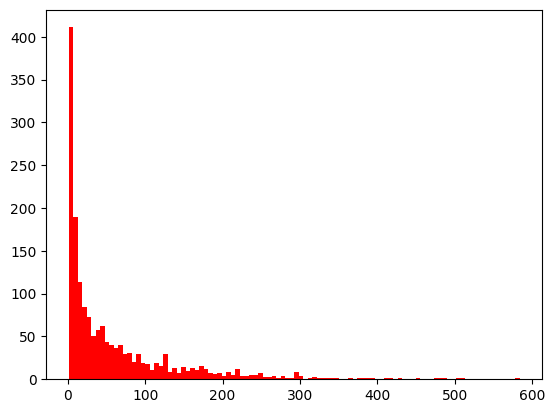

In [ ]:
plt.hist(rating_mean_count_df['count'], bins = 100, color = 'r')

In [ ]:
rating_mean_count_df[rating_mean_count_df['mean'] == 5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


In [ ]:
rating_mean_count_df.sort_values('count', ascending = True).head(100)

,mean,count
title,,
Á köldum klaka (Cold Fever) (1994),3.0,1.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
"Man from Down Under, The (1943)",1.0,1.0
...,...,...
The Courtyard (1995),1.0,1.0
"Vie est belle, La (Life is Rosey) (1987)",1.0,1.0
"Silence of the Palace, The (Saimt el Qusur) (1994)",3.0,1.0


In [ ]:
movies_rating_df

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1
99999,1679,B. Monkey (1998),863,3
100000,1680,Sliding Doors (1998),863,2
100001,1681,You So Crazy (1994),896,3


In [ ]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [ ]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic = userid_movietitle_matrix['Titanic (1997)']

In [ ]:
titanic

,Titanic (1997)
user_id,
0,NaN
1,NaN
2,5.0
3,NaN
4,NaN
...,...
939,NaN
940,5.0
941,NaN


In [ ]:
starwars = userid_movietitle_matrix['Star Wars (1977)']
starwars

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0
...,...
939,NaN
940,4.0
941,NaN


In [ ]:
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns = ['correlation'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
titanic_correlations = titanic_correlations.join(rating_mean_count_df['count'])

In [ ]:
titanic_correlations

,correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [ ]:
titanic_correlations.dropna(inplace = True)

In [ ]:
# Sorting the DataFrame by the 'Correlation' column in descending order
titanic_correlations_sorted = titanic_correlations.sort_values('correlation', ascending=False)


In [ ]:
titanic_correlations_sorted

,correlation,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
...,...,...
Pather Panchali (1955),-1.0,8.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [ ]:
titanic_correlations[titanic_correlations['count']>80].sort_values('correlation', ascending = False).head(10)

,correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
"Last of the Mohicans, The (1992)",0.427239,128.0
Outbreak (1995),0.426237,104.0
Demolition Man (1993),0.411489,92.0


In [ ]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)

In [ ]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
myRatings = pd.read_csv('My_Ratings.csv')
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [ ]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

In [ ]:
similar_movies_list = []  # Initialize as a list instead of a Series

# Loop through the range of ratings
for i in range(len(myRatings)):
    similar_movies = movie_correlations[myRatings['Movie Name'][i]].dropna()
    similar_movies = similar_movies.map(lambda x: x * myRatings['Ratings'][i])
    similar_movies_list.append(similar_movies)  # Append to the list

# If you need this as a Pandas Series or DataFrame later, you can concatenate it:
similar_movies_series = pd.concat(similar_movies_list)


In [ ]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print(similar_movies_list.head(10))

AttributeError: 'list' object has no attribute 'sort_values'